# Section 3.1, Problem 19:

In this notebook, we will explore the behavior of solutions to 2nd Order linear differential equations with varying initial states.

###  $y'' + 5y' + 6y = 0$ 

We will:
- Solve the equation analytically,

- Apply varying initial slopes, $\ \beta$,

- Plot and analyze the family of solutions.

## 1. Symbolic Solution of the Differential Equation

Let's solve the ODE using SymPy by:
- Finding the characteristic equation roots,
- Constructing the general solution,
- Solving for arbitrary constants with initial conditions involving \($\beta$\).

In [4]:
import sympy as sp

t, r, c1, c2, beta = sp.symbols('t r c1 c2 beta')
y = sp.Function('y')

char_eq = sp.Eq(r**2 + 5*r + 6, 0)
rsol = sp.solve(char_eq, r)
print("The roots are ", rsol)  

The roots are  [-3, -2]


So, the general solution is:
$
y(t) = c_1 e^{-3t} + c_2 e^{-2t}
$

Let’s define it in SymPy:

In [5]:
r1, r2 = rsol
genl_soln = c1 * sp.exp(r1 * t) + c2 * sp.exp(r2 * t)
genl_soln

c1*exp(-3*t) + c2*exp(-2*t)

Now, apply the initial conditions:

$y(0) = 1, \quad y'(0) = \beta
$

We solve for $c_1, c_2$ in terms of $\beta$.

In [6]:
# y(0) = c1 + c2 = 1
# y'(t) = c1*r1*exp(r1 t) + c2*r2*exp(r2 t)
dgenl_soln = sp.diff(genl_soln, t)
conditions = [
    sp.Eq(genl_soln.subs(t, 0), 1),
    sp.Eq(dgenl_soln.subs(t, 0), beta)
]
arbconstants = sp.solve(conditions, (c1, c2), dict=True)
arbconstants

[{c1: -beta - 2, c2: beta + 3}]

Substitute these into the general solution to get $ \ \ y_\mathrm{sol}(t, \beta)$.

In [7]:
ysoln = genl_soln.subs(arbconstants[0])
ysoln = sp.simplify(ysoln)
ysoln

(-beta + (beta + 3)*exp(t) - 2)*exp(-3*t)

## 2. Plotting Solutions for Different $\beta$

Let's plot the solution for several values of $\beta$.

We'll use matplotlib for these static plots.

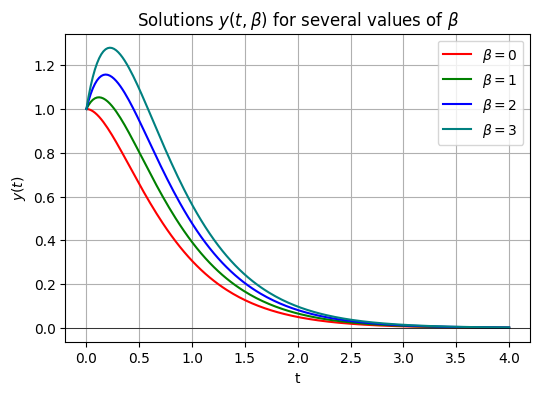

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

y_sol_func = sp.lambdify((t, beta), ysoln, modules='numpy')

fig, ax = plt.subplots(figsize=(6,4))
betas = [0, 1, 2, 3]
colors = ['r', 'g', 'b', 'teal']
t_vals = np.linspace(0, 4, 200)
for b, color in zip(betas, colors):
    ax.plot(t_vals, y_sol_func(t_vals, b), label=fr'$\beta={b}$', color=color)
ax.axhline(0, color='k', lw=0.5)
ax.set_xlabel('t')
ax.set_ylabel(r'$y(t)$')
ax.set_title(r"Solutions $y(t,\beta)$ for several values of $\beta$")
ax.legend()
ax.grid(True)
plt.show()

## 3. Manim Animations 

In [ ]:

from manim import *

import numpy as np

class BetaVariationScene(Scene):
    def construct(self):
        axes = Axes(
            x_range=[0, 4, 1],
            y_range=[-0.3, 1.3, 0.2],
            x_length=7,
            y_length=4,
            axis_config={"color": BLUE},
            tips=False,
        )
        labels = axes.get_axis_labels(x_label="t", y_label="y")

        def yfun(t, b):
            return np.exp(-3 * t) * (-2 - b) + np.exp(-2 * t) * (3 + b)

        time = np.linspace(0, 4, 200)

        betas = [0, 1, 2, 3]
        colors = [RED, GREEN, BLUE, TEAL]

        plots = VGroup()
        for b, color in zip(betas, colors):
            graph = axes.plot(
                lambda tau: yfun(tau, b), color=color, x_range=[0, 4]
            )
            plots.add(graph)

        beta_tracker = ValueTracker(0)
        self.add(beta_tracker)  

        varying_graph = always_redraw(
            lambda: axes.plot(
                lambda tau: yfun(tau, beta_tracker.get_value()),
                color=YELLOW,
                x_range=[0, 4],
            )
        )
        beta_value = always_redraw(
            lambda: DecimalNumber(
                beta_tracker.get_value(),
                num_decimal_places=2,
                unit="\\beta",
                include_sign=True
            ).next_to(axes, UP)
        )

        self.play(Create(axes), Write(labels))
        self.play(*[Create(plot) for plot in plots])
        self.wait()
        self.play(Create(varying_graph), Write(beta_value))
        self.play(beta_tracker.animate.set_value(3), run_time=4)
        self.wait()

In [13]:
%manim -qm BetaVariationScene


Manim Community v0.19.0

[07/09/25 19:16:19] INFO     Writing + to media\Tex\9f38976a758de16a.tex                    ]8;id=657551;file://c:\Users\ihuss\AppData\Local\Programs\Python\Python313\Lib\site-packages\manim\utils\tex_file_writing.py\tex_file_writing.py]8;;\:]8;id=222157;file://c:\Users\ihuss\AppData\Local\Programs\Python\Python313\Lib\site-packages\manim\utils\tex_file_writing.py#111\111]8;;\

[07/09/25 19:16:21] INFO     Writing . to media\Tex\ec2b01090b1fbb55.tex                    ]8;id=600405;file://c:\Users\ihuss\AppData\Local\Programs\Python\Python313\Lib\site-packages\manim\utils\tex_file_writing.py\tex_file_writing.py]8;;\:]8;id=282730;file://c:\Users\ihuss\AppData\Local\Programs\Python\Python313\Lib\site-packages\manim\utils\tex_file_writing.py#111\111]8;;\

[07/09/25 19:16:22] INFO     Writing \beta to media\Tex\3589aa7db3ecaa52.tex                ]8;id=961659;file://c:\Users\ihuss\AppData\Local\Programs\Python\Python313\Lib\site-packages\manim\utils\tex_file_writing.py\tex_file_writing.py]8;;\:]8;id=836681;file://c:\Users\ihuss\AppData\Local\Programs\Python\Python313\Lib\site-packages\manim\utils\tex_file_writing.py#111\111]8;;\

[07/09/25 19:16:24] INFO     Animation 0 : Partial movie file written in                   ]8;id=501121;file://c:\Users\ihuss\AppData\Local\Programs\Python\Python313\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=557501;file://c:\Users\ihuss\AppData\Local\Programs\Python\Python313\Lib\site-packages\manim\scene\scene_file_writer.py#588\588]8;;\
                             'C:\Users\ihuss\EN540205-6\de_206\jupyter_notebooks\media\vid                         
                             eos\jupyter_notebooks\720p30\partial_movie_files\BetaVariatio                         
                             nScene\2016333726_658698761_880321056.mp4'                                            

[07/09/25 19:16:25] INFO     Animation 1 : Partial movie file written in                   ]8;id=71441;file://c:\Users\ihuss\AppData\Local\Programs\Python\Python313\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=215017;file://c:\Users\ihuss\AppData\Local\Programs\Python\Python313\Lib\site-packages\manim\scene\scene_file_writer.py#588\588]8;;\
                             'C:\Users\ihuss\EN540205-6\de_206\jupyter_notebooks\media\vid                         
                             eos\jupyter_notebooks\720p30\partial_movie_files\BetaVariatio                         
                             nScene\543634251_186891742_3676466193.mp4'                                            

                    INFO     Animation 2 : Partial movie file written in                   ]8;id=116126;file://c:\Users\ihuss\AppData\Local\Programs\Python\Python313\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=380311;file://c:\Users\ihuss\AppData\Local\Programs\Python\Python313\Lib\site-packages\manim\scene\scene_file_writer.py#588\588]8;;\
                             'C:\Users\ihuss\EN540205-6\de_206\jupyter_notebooks\media\vid                         
                             eos\jupyter_notebooks\720p30\partial_movie_files\BetaVariatio                         
                             nScene\543634251_2688965532_1577344218.mp4'                                           

[07/09/25 19:16:27] INFO     Animation 3 : Partial movie file written in                   ]8;id=579626;file://c:\Users\ihuss\AppData\Local\Programs\Python\Python313\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=672079;file://c:\Users\ihuss\AppData\Local\Programs\Python\Python313\Lib\site-packages\manim\scene\scene_file_writer.py#588\588]8;;\
                             'C:\Users\ihuss\EN540205-6\de_206\jupyter_notebooks\media\vid                         
                             eos\jupyter_notebooks\720p30\partial_movie_files\BetaVariatio                         
                             nScene\543634251_1810970407_2707322909.mp4'                                           

Animation 4: _MethodAnimation(ValueTracker):  12%|#1        | 14/120 [00:00<00:04, 22.26it/s]

[07/09/25 19:16:28] INFO     Writing 6 to media\Tex\b330e3953bf029d7.tex                    ]8;id=954158;file://c:\Users\ihuss\AppData\Local\Programs\Python\Python313\Lib\site-packages\manim\utils\tex_file_writing.py\tex_file_writing.py]8;;\:]8;id=353294;file://c:\Users\ihuss\AppData\Local\Programs\Python\Python313\Lib\site-packages\manim\utils\tex_file_writing.py#111\111]8;;\

Animation 4: _MethodAnimation(ValueTracker):  14%|#4        | 17/120 [00:02<00:21,  4.78it/s]

[07/09/25 19:16:29] INFO     Writing 7 to media\Tex\810c550cdbbf29da.tex                    ]8;id=200527;file://c:\Users\ihuss\AppData\Local\Programs\Python\Python313\Lib\site-packages\manim\utils\tex_file_writing.py\tex_file_writing.py]8;;\:]8;id=530799;file://c:\Users\ihuss\AppData\Local\Programs\Python\Python313\Lib\site-packages\manim\utils\tex_file_writing.py#111\111]8;;\

Animation 4: _MethodAnimation(ValueTracker):  16%|#5        | 19/120 [00:03<00:31,  3.20it/s]

[07/09/25 19:16:31] INFO     Writing 8 to media\Tex\b47c9feb1c667bc8.tex                    ]8;id=414334;file://c:\Users\ihuss\AppData\Local\Programs\Python\Python313\Lib\site-packages\manim\utils\tex_file_writing.py\tex_file_writing.py]8;;\:]8;id=693148;file://c:\Users\ihuss\AppData\Local\Programs\Python\Python313\Lib\site-packages\manim\utils\tex_file_writing.py#111\111]8;;\

Animation 4: _MethodAnimation(ValueTracker):  18%|#7        | 21/120 [00:04<00:38,  2.60it/s]

[07/09/25 19:16:32] INFO     Writing 9 to media\Tex\d994363fa45e89a1.tex                    ]8;id=583092;file://c:\Users\ihuss\AppData\Local\Programs\Python\Python313\Lib\site-packages\manim\utils\tex_file_writing.py\tex_file_writing.py]8;;\:]8;id=991559;file://c:\Users\ihuss\AppData\Local\Programs\Python\Python313\Lib\site-packages\manim\utils\tex_file_writing.py#111\111]8;;\

[07/09/25 19:16:37] INFO     Animation 4 : Partial movie file written in                   ]8;id=241757;file://c:\Users\ihuss\AppData\Local\Programs\Python\Python313\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=421325;file://c:\Users\ihuss\AppData\Local\Programs\Python\Python313\Lib\site-packages\manim\scene\scene_file_writer.py#588\588]8;;\
                             'C:\Users\ihuss\EN540205-6\de_206\jupyter_notebooks\media\vid                         
                             eos\jupyter_notebooks\720p30\partial_movie_files\BetaVariatio                         
                             nScene\543634251_1114231332_2240454425.mp4'                                           

                    INFO     Animation 5 : Partial movie file written in                   ]8;id=989511;file://c:\Users\ihuss\AppData\Local\Programs\Python\Python313\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=369169;file://c:\Users\ihuss\AppData\Local\Programs\Python\Python313\Lib\site-packages\manim\scene\scene_file_writer.py#588\588]8;;\
                             'C:\Users\ihuss\EN540205-6\de_206\jupyter_notebooks\media\vid                         
                             eos\jupyter_notebooks\720p30\partial_movie_files\BetaVariatio                         
                             nScene\543634251_1754310298_3747604641.mp4'                                           

                    INFO     Combining to Movie file.                                      ]8;id=563371;file://c:\Users\ihuss\AppData\Local\Programs\Python\Python313\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=406764;file://c:\Users\ihuss\AppData\Local\Programs\Python\Python313\Lib\site-packages\manim\scene\scene_file_writer.py#739\739]8;;\

[07/09/25 19:16:38] INFO                                                                   ]8;id=520187;file://c:\Users\ihuss\AppData\Local\Programs\Python\Python313\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=595266;file://c:\Users\ihuss\AppData\Local\Programs\Python\Python313\Lib\site-packages\manim\scene\scene_file_writer.py#886\886]8;;\
                             File ready at                                                                         
                             'C:\Users\ihuss\EN540205-6\de_206\jupyter_notebooks\media\vid                         
                             eos\jupyter_notebooks\720p30\BetaVariationScene.mp4'                                  
                                                                                                                   

                    INFO     Rendered BetaVariationScene                                               ]8;id=971015;file://c:\Users\ihuss\AppData\Local\Programs\Python\Python313\Lib\site-packages\manim\scene\scene.py\scene.py]8;;\:]8;id=648822;file://c:\Users\ihuss\AppData\Local\Programs\Python\Python313\Lib\site-packages\manim\scene\scene.py#255\255]8;;\
                             Played 6 animations                                                                   

We see all solutions exhibit similar (decaying) behavior for varying $\beta$.  
Next, let's examine analytically where the solution has an extremum, i.e., where $y'(t, \beta) = 0$.

In [ ]:
dysoln = sp.diff(ysoln, t)
solvemin = sp.solve(sp.Eq(dysoln, 0), t, domain=sp.S.Reals)
solvemin

[log(3*(beta + 2)/(2*(beta + 3)))]

So the extremum (maximum) occurs at:

$t^*(\beta) = \log\left( \frac{3(2+\beta)}{2(3+\beta)} \right)$

(valid for $\beta > -2$ or $\beta < -3$).

Let's plot $t^*(\beta)$ as a function of $\beta$.

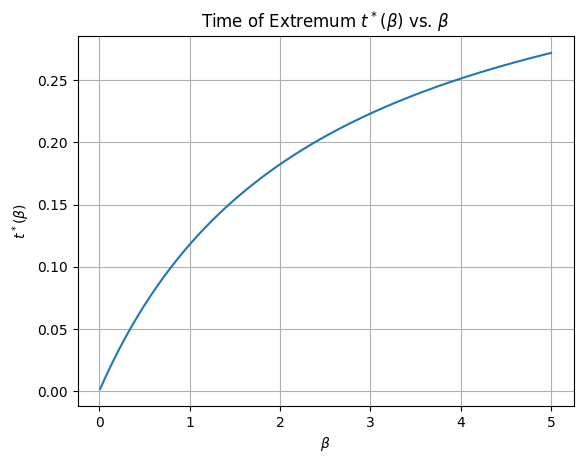

In [ ]:
dysoln = sp.diff(ysoln, t)
solvemin = sp.solve(sp.Eq(dysoln, 0), t, domain=sp.S.Reals)
tstar_sol = solvemin[0]
if hasattr(tstar_sol, 'expr'):
    tstar_expr = tstar_sol.expr
else:
    tstar_expr = tstar_sol

tstar_func = sp.lambdify(beta, tstar_expr, modules="numpy")
beta_vals = np.linspace(0.01, 5, 200)
plt.plot(beta_vals, tstar_func(beta_vals))
plt.xlabel(r'$\beta$')
plt.ylabel(r'$t^*(\beta)$')
plt.title('Time of Extremum $t^*(\\beta)$ vs. $\\beta$')
plt.grid(True)
plt.show()

As $\beta$ gets large, both $t^*$ and $\beta$ tend to infinity.  
This matches our original analysis.